# Minimal No / Learn Lasagne Demo (multilayer perceptron)
In this script we build a small multilayer perceptron with two hidden layers having 500 and 50 neurons each for classifying the MNIST database of handwritten digits.  


## Loading the data
As before we restrict us to the first 4000 digits so that an interactive session is possible.  

### Data-Format
For Lasagne all images must be provided in a 4-dimensional array X with the following dimensions (number of images, number of colors, x, y) and the labels in a vector y of same size. So X[1,0,1,2] would be the image number 1, the color channel 0 and the pixel x = (1,2).

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as imgplot

import cPickle as pickle
import gzip
with gzip.open('../mnist_4000.pkl.gz', 'rb') as f:
    (X,y) = pickle.load(f)
PIXELS = len(X[0,0,0,:])
X.shape, y.shape, PIXELS

((4000, 1, 28, 28), (4000,), 28)

In [2]:
X[0,0,15,16] 

1.0584806

##### Let s plot the first few images and label

In [4]:
y[0:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=int32)

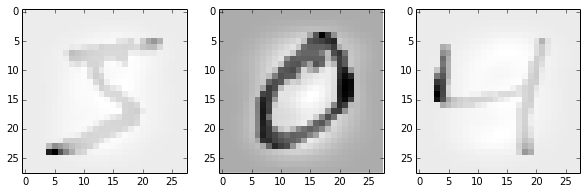

In [4]:
fig = plt.figure(figsize=(10,30))
for i in range(3):
    a=fig.add_subplot(1,3,(i+1))
    plt.imshow(-X[i,0,:,:], interpolation='none',cmap=plt.get_cmap('gray'))

Note that the backgound is not uniform. That is due to the batchnormalization.

### Our first simple network
Let's define a MLP. First we load the necessary libraries and then define the network. 
#### Definition of the network
There are several ways to define a network in Lasagne. We use the easiest method using the `NeuralNet` class from the `nolearn.lasagne` package. Other ways are detailed in the examples [https://github.com/Lasagne/Lasagne/blob/master/examples/]
 of the Lasagne library. 


In [5]:
from lasagne import layers
from lasagne import nonlinearities
from nolearn.lasagne import NeuralNet

net1 = NeuralNet(
    # Geometry of the network
    layers=[
        ('input', layers.InputLayer),
        ('hidden1', layers.DenseLayer),
        ('hidden2', layers.DenseLayer),
        ('output', layers.DenseLayer),
        ],
    input_shape=(None, 1, PIXELS, PIXELS), #None in the first axis indicates that the batch size can be set later
    hidden1_num_units=500,
    hidden2_num_units=50,
    output_num_units=10, output_nonlinearity=nonlinearities.softmax,

    # learning rate parameters
    update_learning_rate=0.01,
    update_momentum=0.9,
    regression=False,
    # We only train for 10 epochs
    max_epochs=100,
    verbose=1,

    # Training test-set split
    eval_size = 0.2
    )

####Training of the net. 

After the definition of the network the network has to be trained. Therefore the data is split automatically into 80% training set and 20% test set (controlled by `eval_size=0.2`). We use the first 3000 samples as the training set.  

In [6]:
net = net1.fit(X[0:3000,:,:,:],y[0:3000])

  DenseLayer        	(None, 10)          	produces      10 outputs
  DenseLayer        	(None, 50)          	produces      50 outputs
  DenseLayer        	(None, 500)         	produces     500 outputs
  InputLayer        	(None, 1, 28, 28)   	produces     784 outputs

 Epoch  |  Train loss  |  Valid loss  |  Train / Val  |  Valid acc  |  Dur
--------|--------------|--------------|---------------|-------------|-------
     1  |    1.521511  |    0.720588  |     2.111486  |     81.26%  |  0.1s
     2  |    0.475192  |    0.445516  |     1.066611  |     86.43%  |  0.1s
     3  |    0.280350  |    0.387424  |     0.723626  |     87.27%  |  0.1s
     4  |    0.198154  |    0.350649  |     0.565105  |     88.99%  |  0.1s
     5  |    0.148243  |    0.330319  |     0.448788  |     89.99%  |  0.1s
     6  |    0.115779  |    0.319296  |     0.362608  |     90.30%  |  0.1s
     7  |    0.092974  |    0.311827  |     0.298160  |     90.83%  |  0.1s
     8  |    0.076037  |    0.307374  |     0.2

/Library/Python/2.7/site-packages/lasagne/init.py:86: UserWarning: The uniform initializer no longer uses Glorot et al.'s approach to determine the bounds, but defaults to the range (-0.01, 0.01) instead. Please use the new GlorotUniform initializer to get the old behavior. GlorotUniform is now the default for all layers.
  warnings.warn("The uniform initializer no longer uses Glorot et al.'s "
/Library/Python/2.7/site-packages/lasagne/layers/helper.py:69: UserWarning: get_all_layers() has been changed to return layers in topological order. The former implementation is still available as get_all_layers_old(), but will be removed before the first release of Lasagne. To ignore this warning, use `warnings.filterwarnings('ignore', '.*topo.*')`.
  warnings.warn("get_all_layers() has been changed to return layers in "
/Library/Python/2.7/site-packages/lasagne/layers/base.py:99: UserWarning: layer.get_output_shape() is deprecated and will be removed for the first release of Lasagne. Please us

### Fitting procedure / log loss
The log-loss $J(\theta)$ is calculated for the training-set and validation set. It is defined as follows:
<img src="imgs/logloss.png" width="700"/>



It is plotted for each epoch below. An  epoch is defined by touching each member of the training set once.

   epoch  train_loss  valid_accuracy  valid_loss
0      1    1.521511        0.812586    0.720588
1      2    0.475192        0.864251    0.445516
2      3    0.280350        0.872699    0.387424
3      4    0.198154        0.889887    0.350649
4      5    0.148243        0.899897    0.330319
    epoch  train_loss  valid_accuracy  valid_loss
95     96    0.001516        0.914595    0.326720
96     97    0.001496        0.914595    0.326967
97     98    0.001475        0.914595    0.327230
98     99    0.001456        0.914595    0.327449
99    100    0.001437        0.914595    0.327699


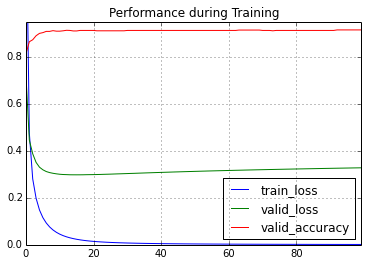

In [7]:
%matplotlib inline
import pandas as pd
df = pd.DataFrame(net.train_history_)
print(df.head())
print(df.tail())
df[['train_loss','valid_loss','valid_accuracy']].plot(title='Performance during Training', ylim=(0,0.95))

## Task 1 (evaluate the learning phase)
* What is the value of the log-loss for perfect classification?
* [optional] What is the value for the log-loss for random assignment to the classes?
* Describe the form of the curve

## Task 1 (LSG)
* 0 since log(1)=0
* For random assinment the probability for each class ist 1/10. So ln(1/10) = -2.3. Hence J = 2.3
* The training loss reaches the optimal value of 0 but the validation loss on the untouched validation set goes to goes up a again. This indicates overfitting to the training set.

## Task 2 (evaluate on testset)
Now that we have fixed the weights of the network, we can make predictions on the unseen data in the row 3000-4000 and evaluate the performance. You can use `net.predict`

In [8]:
np.mean(net.predict(X[3000:4000,:,:,:]) == y[3000:4000])

0.92300000000000004

## Misc (just try to understand the code)

Note that the softmax layer assigns the following probabilities to the for the classes $i = 0,1,\ldots,9$ 

$
   p_i(\text{input image}) =  \frac{e^{z_i}}{\sum_{j=0}^9 e^{z_j}}
$

which he can obtain for a set of indices like via `net.predict_proba(X[toTest,:,:,:])`. The index with maximum probability is the predicted class and can be obtained by `net1.predict(X[toTest,:,:,:])`.

In [9]:
toTest = range(3001,3026) #Some indices we would like to have a look into
preds = net1.predict(X[toTest,:,:,:])
print(preds) #The predictions for the different classes 
print(net.predict_proba(X[toTest,:,:,:])[0:4]) #The probabilities from the softmax layer.
np.argmax(net.predict_proba(X[toTest,:,:,:])[0])

[0 8 8 1 3 2 5 7 4 8 8 0 3 8 0 0 2 4 1 9 0 9 2 0 5]
[[  9.98994350e-01   8.27815043e-08   1.39464319e-04   5.64406473e-05
    3.21627425e-07   1.90213359e-05   5.09600250e-05   8.01888473e-06
    7.00854464e-04   3.04607183e-05]
 [  8.53041303e-04   6.35988617e-05   2.43164822e-01   3.21212597e-02
    5.76937431e-03   4.64971457e-03   1.00540686e-02   1.70999482e-01
    4.20066714e-01   1.12257898e-01]
 [  2.17884910e-08   2.53272020e-07   2.87327371e-08   2.00727783e-07
    2.07591047e-08   2.03568216e-05   1.07033785e-07   1.90274185e-10
    9.99979019e-01   6.67910571e-09]
 [  8.47930504e-10   9.99972582e-01   2.35112338e-07   2.21639893e-05
    9.54315055e-07   1.72435921e-09   2.52479526e-06   4.05404052e-07
    2.43613982e-07   8.77339517e-07]]


0

####Let's look at the correponding images.
Shown is the predicted value and the true value in parenthesis.

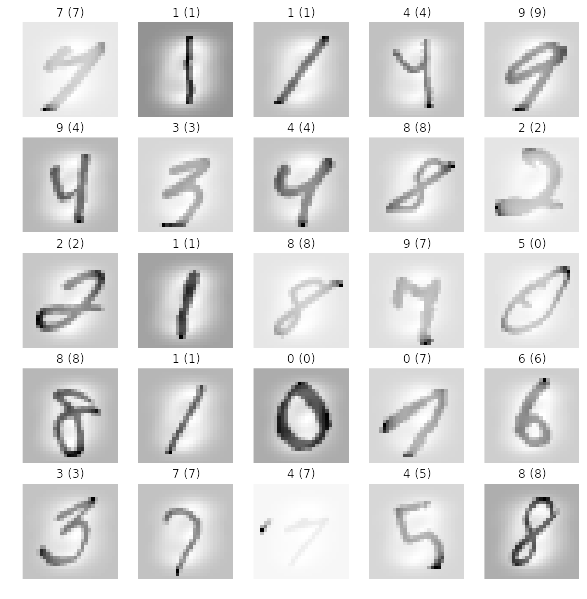

In [21]:
fig = plt.figure(figsize=(10,10))
for i,num in enumerate(toTest):
    a=fig.add_subplot(5,5,(i+1)) #NB the one based API sucks!
    plt.axis('off')
    a.set_title(str(preds[i]) + " (" + str(y[num]) + ")")
    plt.imshow(-X[num,0,:,:], interpolation='none',cmap=plt.get_cmap('gray'))

In the notebook [MinimalLasagneCNN.ipynb](MinimalLasagneCNN.ipynb) we show how to use a CNN.